# Loan elegibility Prediction

In [1]:
import pandas as pd 
a=pd.read_csv("C:/Users/91973/Downloads/Loan_Default.csv")

In [2]:
pd.set_option("display.max_columns",90)
pd.set_option("display.max_row",200)

In [3]:
a.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [30]:
a.corr()[["Status"]].sort_values(by="Status")

,Status
income,-6.369843e-02
property_value,-3.952952e-02
loan_amount,-3.682528e-02
Upfront_charges,-1.423662e-03
term,-2.397804e-04
Interest_rate_spread,-2.962990e-17
rate_of_interest,1.952158e-03
Credit_Score,4.003694e-03
LTV,3.146519e-02
dtir1,6.129020e-02


In [4]:
a.drop(labels=['ID'],axis=1,inplace=True)

In [5]:
a.head()

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

In [7]:
# all NaN value are fill up and 30% NaN value columns are removing
def replacer(a):
    import pandas as pd
    Q=pd.DataFrame(a.isna().sum(),columns=["ct"])
    for i in Q[Q.ct>0].index:
        if (a[i].dtype=="object"):
            x=a[i].mode()[0]
            a[i]=a[i].fillna(x)
        else:
            x=a[i].mean()
            a[i]=a[i].fillna(x)

In [8]:
replacer(a)

In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 148670 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              148670 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148670 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           148670 non-null  float64
 11  Interest_rate_spread       148670 non-null  float64
 12  Upfront_charges            148670 non-null  float64
 13  term                       14

# Data Visulazation

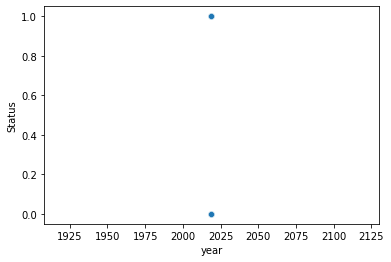

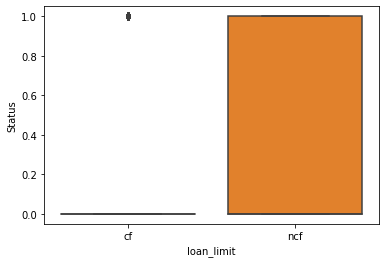

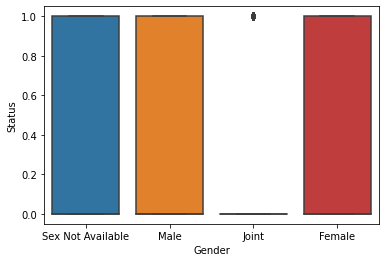

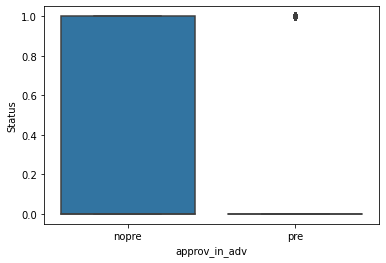

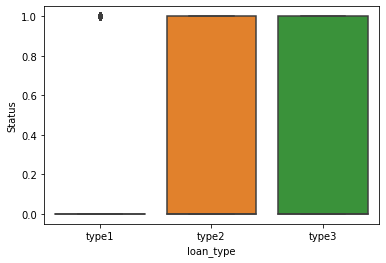

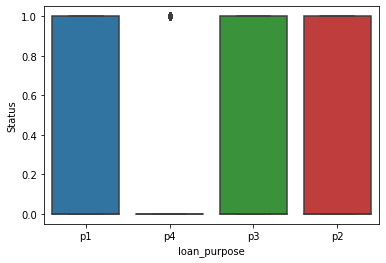

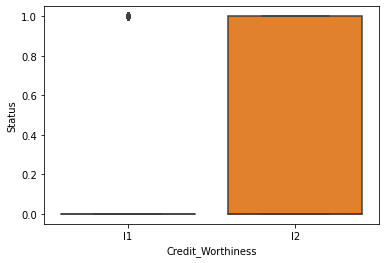

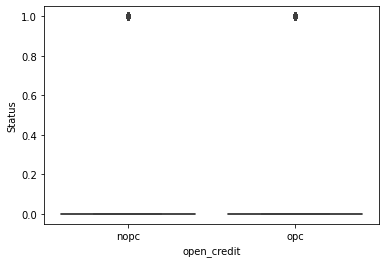

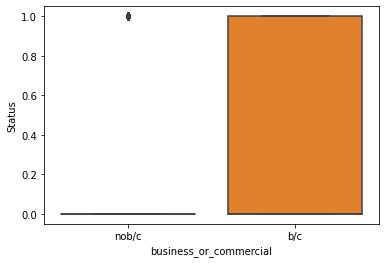

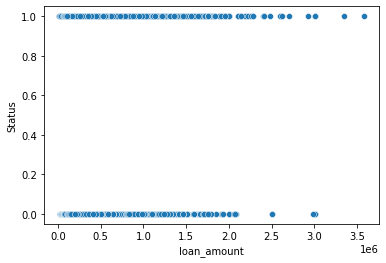

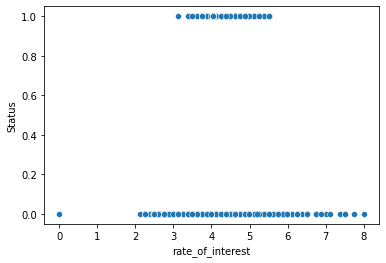

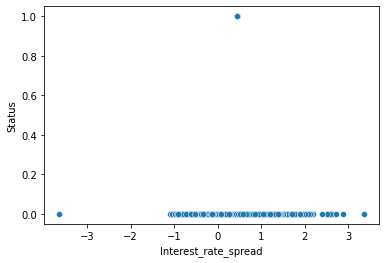

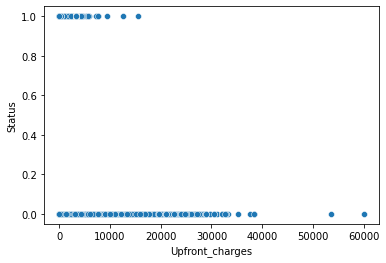

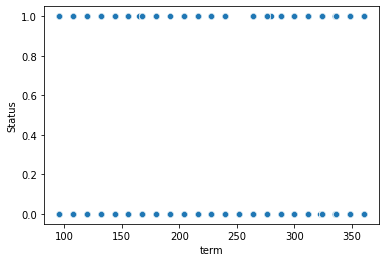

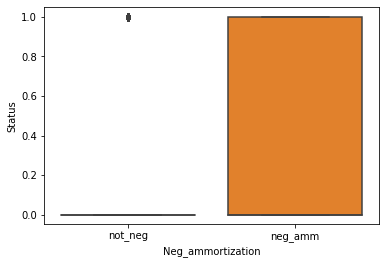

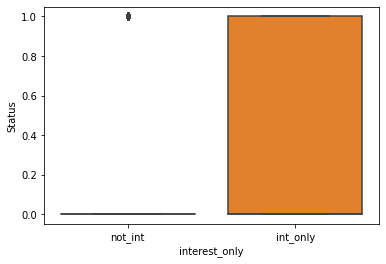

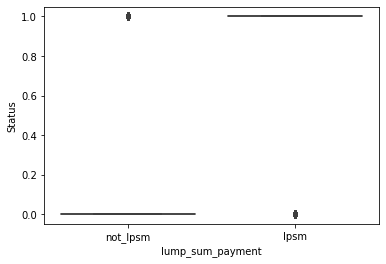

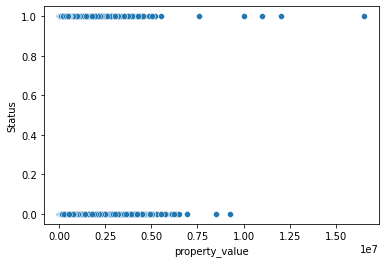

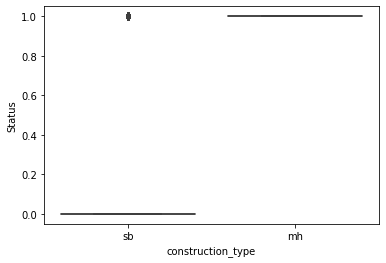

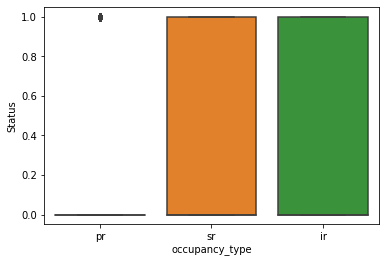

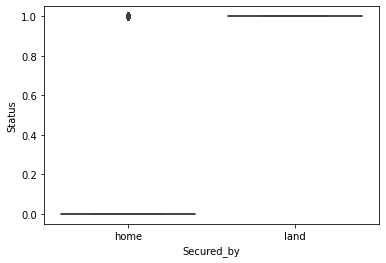

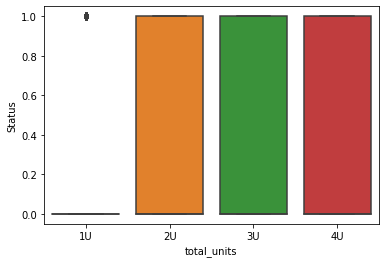

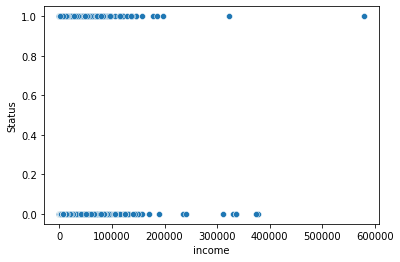

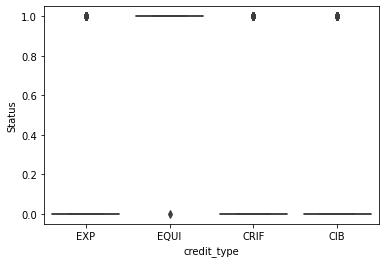

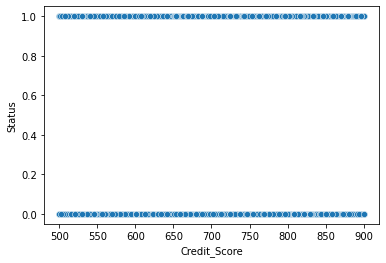

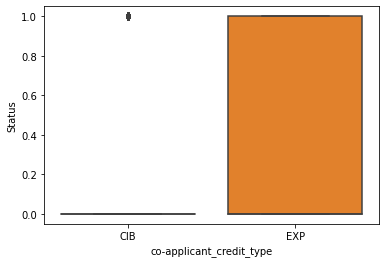

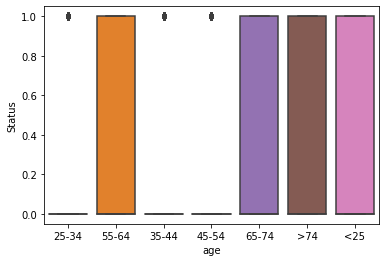

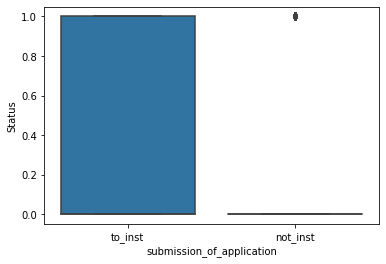

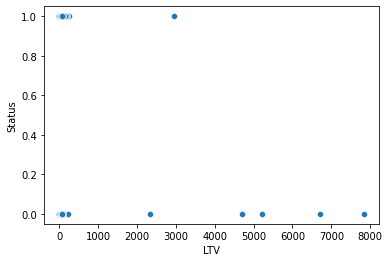

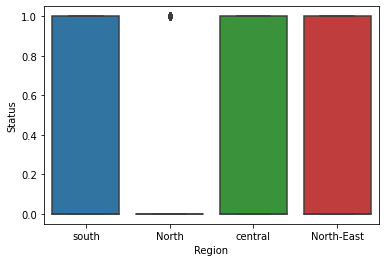

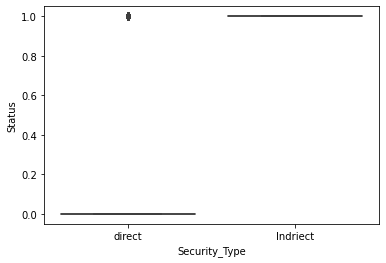

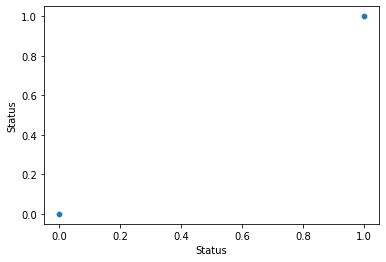

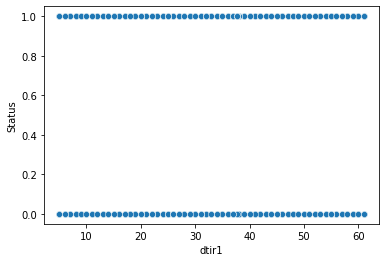

In [10]:
p = a[["Status"]]

from warnings import filterwarnings
filterwarnings("ignore")

import seaborn as sb
import matplotlib.pyplot as plt
for i in a.columns:
    if(a[i].dtypes == "object"):
        sb.boxplot(a[i],a.Status)
        plt.show()
    else:
        sb.scatterplot(a[i],a.Status)
        plt.show()

In [11]:
cat=[]
con=[]

In [12]:
# cat value and con value sepereable
for i in a.columns:
    if (a[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)

In [13]:
X1=pd.get_dummies(a[cat])

In [14]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# X2=pd.DataFrame(ss.fit_transform(a[con]),columns=con)
# # # other method preprocessing normalizing and Z Score Standarzation

In [15]:
X2=a[con]

In [16]:
X3=X2.join(X1) # join cat and con columns


In [17]:
X3

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l1,Credit_Worthiness_l2,open_credit_nopc,open_credit_opc,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,interest_only_int_only,interest_only_not_int,lump_sum_payment_lpsm,lump_sum_payment_not_lpsm,construction_type_mh,construction_type_sb,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,Secured_by_home,Secured_by_land,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,2019,116500,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,98.728814,1,45.000000,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,2019,206500,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,72.746457,1,37.732932,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1
2,2019,406500,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,80.019685,0,46.000000,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,2019,456500,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,69.376900,0,42.000000,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,2019,696500,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,91.886544,0,39.000000,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,2019,436500,3.125000,0.257100,9960.000000,180.0,608000.000000,7860.0,659,71.792763,0,48.000000,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
148666,2019,586500,5.190000,0.854400,0.000000,360.0,788000.000000,7140.0,569,74.428934,0,15.000000,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
148667,2019,446500,3.125000,0.081600,1226.640000,180.0,728000.000000,6900.0,702,61.332418,0,49.000000,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
148668,2019,196500,3.500000,0.582400,4323.330000,180.0,278000.000000,7140.0,737,70.683453,0,29.000000,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1


In [18]:
X=X3.drop(labels=["Status"],axis=1)

In [19]:
Y=pd.DataFrame(X3["Status"])

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0) # split the data training and testing set

In [21]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()
# This adds a constant column with 1 value, this is done to get b0(intercept)
# pvalue of a column idealy should be lesser than 0.05, means its a good predictor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Status   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     1832.
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:28:21   Log-Likelihood:                -37210.
No. Observations:              118936   AIC:                         7.451e+04
Df Residuals:                  118890   BIC:                         7.496e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
year                                   0.0006   1.81e-05     30.983      0.000       0.001       0.001
loan_amount                         1.133e-07   9.19e-09     12.329      0.000    9.53e-08    1.31e-07
rate_of_interest                       0.0027      0.003      0.869      0.385      -0.003       0.009
Interest_rate_spread                  -0.0900      0.004    -24.950      0.000      -0.097      -0.083
Upfront_charges                    -4.544e-06   3.92e-07    -11.599      0.000   -5.31e-06   -3.78e-06
term                               -6.503e-05   1.95e-05     -3.335      0.001      -0.000   -2.68e-05
property_value                     -4.021e-08   4.51e-09     -8.915      0.000   -4.91e-08   -3.14e-08
income                             -2.167e-06   1.84e-07    -11.772      0.000   -2.53e-06   -1.81e-06
Credit_Score                        1.379e-05   8.28e-06      1.665      0.096   -2.44e-06       3e-05
LTV                                    0.0003   2.48e-05     10.194      0.000       0.000       0.000
dtir1                                  0.0017      0.000     15.808      0.000       0.001       0.002
loan_limit_cf                         -0.0360      0.002    -17.627      0.000      -0.040      -0.032
loan_limit_ncf                         0.0360      0.002     17.627      0.000       0.032       0.040
Gender_Female                         -0.0075      0.002     -3.571      0.000      -0.012      -0.003
Gender_Joint                        5.374e-06      0.002      0.002      0.998      -0.005       0.005
Gender_Male                            0.0064      0.002      3.428      0.001       0.003       0.010
Gender_Sex Not Available               0.0011      0.002      0.492      0.623      -0.003       0.006
approv_in_adv_nopre                    0.0115      0.001      8.399      0.000       0.009       0.014
approv_in_adv_pre                     -0.0115      0.001     -8.399      0.000      -0.014      -0.009
loan_type_type1                        0.0059      0.002      3.513      0.000       0.003       0.009
loan_type_type2                        0.0376      0.001     36.081      0.000       0.036       0.040
loan_type_type3                       -0.0435      0.002    -21.143      0.000      -0.048      -0.040
loan_purpose_p1                       -0.0263      0.002    -10.792      0.000      -0.031      -0.021
loan_purpose_p2                        0.0576      0.005     11.404      0.000       0.048       0.067
loan_purpose_p3                       -0.0076      0.002     -3.470      0.001      -0.012      -0.003
loan_purpose_p4                       -0.0238      0.002    -10.600      0.000      -0.028      -0.019
Credit_Worthiness_l1                  -0.0228      0.002     -9.265      0.000      -0.028      

In [22]:
xtrain.shape

(118936, 70)

In [23]:
xtest.shape

(29734, 70)

# applied ANN

In [24]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [28]:
nn = Sequential()
nn.add(LSTM(50,return_sequences=True,input_shape=(70,1)))
nn.add(LSTM(100,return_sequences=True))
nn.add(Dense(1))

In [29]:
nn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
nn.fit(xtrain,ytrain,batch_size=500,epochs=1)

238/238 [==============================] - 80s 328ms/step - loss: 0.5731 - accuracy: 0.7481


In [33]:
nn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
nn.fit(xtest,ytest,batch_size=1000,epochs=2)

Epoch 1/2
30/30 [==============================] - 21s 624ms/step - loss: 0.5635 - accuracy: 0.7509
Epoch 2/2
30/30 [==============================] - 19s 618ms/step - loss: 0.5600 - accuracy: 0.7509
